In [1]:
!pip install kaggle

In [2]:
import numpy as np
import pandas as pd
import spacy
import nltk
import seaborn as sns
import re
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

In [3]:
# from google.colab import files

# uploaded = files.upload()

# #import both files AT ONCE!

In [4]:
# importing dataset

# modify file path based on your file location
trainingSet = pd.read_csv('Assignment Data/twitter_training.csv')
train_data, test_data = train_test_split(trainingSet, test_size=7000, random_state=42)

# Then, split the training data into training (50k) and validation (20k) sets
train_data, validation_data = train_test_split(train_data, test_size=20000, random_state=42)

#validationSet = pd.read_csv('twitter_validation.csv')

In [5]:
#trainingSet.columns = ['Twitter ID', 'Entity', 'Sentiment', 'Tweets']
#validationSet.columns = ['Twitter ID', 'Entity', 'Sentiment', 'Tweets']

train_data.columns = ['Twitter ID', 'Entity', 'Sentiment', 'Tweets']
test_data.columns = ['Twitter ID', 'Entity', 'Sentiment', 'Tweets']
validation_data.columns = ['Twitter ID', 'Entity', 'Sentiment', 'Tweets']

In [6]:
train_data

,Twitter ID,Entity,Sentiment,Tweets
50474,6264,FIFA,Positive,"Play the rest of the season, and the Euros, on..."
11681,8408,NBA2K,Negative,2k games is never the same again .
68997,3816,Cyberpunk2077,Positive,the new cyberpunk 2077 a gameplay demo is just...
10999,13091,Xbox(Xseries),Positive,I'm extremely lukewarm on..... Outside of Spid...
49448,6088,FIFA,Irrelevant,"ON NEXT DAY;. 27th April 1993, a tragedy. roc..."
...,...,...,...,...
878,2555,Borderlands,Negative,Holy shit borderlands 3 st ass.
31380,7389,LeagueOfLegends,Neutral,Had a thought to use kbm players to play Leagu...
73445,8981,Nvidia,Positive,"Andrew Gostine, MD, MBA tells the story of how..."
38175,5345,Hearthstone,Negative,i suck at serving hearthstone today i -


In [7]:
test_data

,Twitter ID,Entity,Sentiment,Tweets
34877,6792,Fortnite,Irrelevant,went to go in george's room to find his door w...
21704,4115,CS-GO,Positive,Yo this looks LIT! Team:GO/Overwatch combo
47008,5665,HomeDepot,Negative,Pay attention executive administrators. While ...
7969,9369,Overwatch,Irrelevant,Guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one
...,...,...,...,...
14946,2960,Dota2,Negative,@ DOTA2 Do you care about the player base at a...
49453,6089,FIFA,Negative,@ EAHelp I bought fifa 21 per unit. I play wit...
6698,353,Amazon,Neutral,NaN
34768,6771,Fortnite,Positive,@AppStore plz unban fortnite I mean people Pro...


In [8]:
validation_data

,Twitter ID,Entity,Sentiment,Tweets
58085,11560,TomClancysRainbowSix,Positive,Shhhhh! Something is loading! . .
58821,3283,Facebook,Negative,Maybe I already ’ m tired of scrolling on Face...
42258,10050,PlayerUnknownsBattlegrounds(PUBG),Positive,I've just played pub with someone with a sweet...
18999,12455,WorldOfCraft,Neutral,1 Check out this item please I just once got! ...
56970,11374,TomClancysRainbowSix,Positive,It was fun!
...,...,...,...,...
50351,6244,FIFA,Irrelevant,You got this Kathy!! Make KC proud .
59901,3466,Facebook,Neutral,"2 Aww, I never knew Twitter launches balloons ..."
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...
33743,6596,Fortnite,Irrelevant,so my crush is listening to random song in our...


# Exploratory Data Analysis

In [9]:
train_data.describe()

,Twitter ID
count,47681.000000
mean,6435.363709
std,3748.660756
min,1.000000
25%,3194.000000
50%,6411.000000
75%,9620.000000
max,13200.000000


In [10]:
validation_data.describe()

,Twitter ID
count,20000.000000
mean,6415.384300
std,3722.306833
min,1.000000
25%,3195.000000
50%,6407.500000
75%,9551.500000
max,13200.000000


In [11]:
test_data.describe()

,Twitter ID
count,7000.000000
mean,6463.390857
std,3736.176063
min,1.000000
25%,3207.500000
50%,6505.000000
75%,9608.250000
max,13200.000000


C:\Users\Loricson\AppData\Local\Temp\ipykernel_45416\4229215950.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  xAxis = sns.countplot(x = 'Sentiment', data = train_data, palette = 'muted')


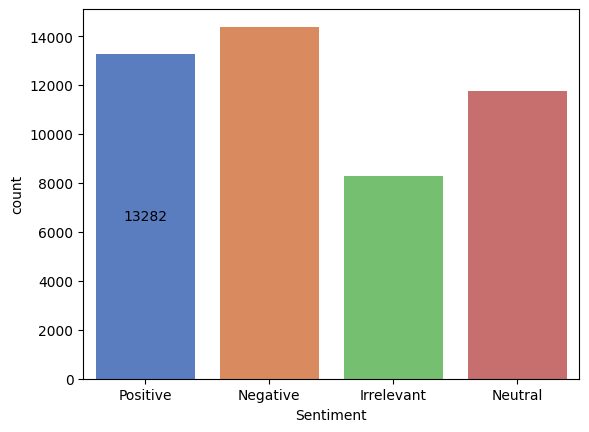

In [12]:
xAxis = sns.countplot(x = 'Sentiment', data = train_data, palette = 'muted')
xAxis.bar_label(xAxis.containers[0], label_type='center')
plt.show()

C:\Users\Loricson\AppData\Local\Temp\ipykernel_45416\2774679538.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  xAxis = sns.countplot(x = 'Sentiment', data = validation_data, palette = 'muted')


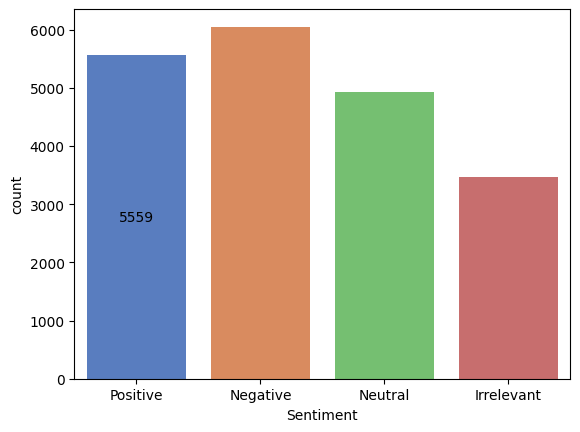

In [13]:
xAxis = sns.countplot(x = 'Sentiment', data = validation_data, palette = 'muted')
xAxis.bar_label(xAxis.containers[0], label_type='center')
plt.show()

C:\Users\Loricson\AppData\Local\Temp\ipykernel_45416\3194549104.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  xAxis = sns.countplot(x = 'Sentiment', data = test_data, palette = 'muted')


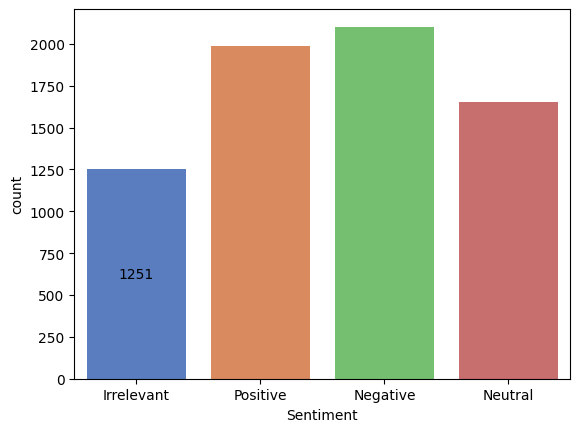

In [14]:
xAxis = sns.countplot(x = 'Sentiment', data = test_data, palette = 'muted')
xAxis.bar_label(xAxis.containers[0], label_type='center')
plt.show()

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47681 entries, 50474 to 41889
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Twitter ID  47681 non-null  int64 
 1   Entity      47681 non-null  object
 2   Sentiment   47681 non-null  object
 3   Tweets      47256 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [16]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 58085 to 24412
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Twitter ID  20000 non-null  int64 
 1   Entity      20000 non-null  object
 2   Sentiment   20000 non-null  object
 3   Tweets      19815 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.2+ KB


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 34877 to 18726
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Twitter ID  7000 non-null   int64 
 1   Entity      7000 non-null   object
 2   Sentiment   7000 non-null   object
 3   Tweets      6924 non-null   object
dtypes: int64(1), object(3)
memory usage: 273.4+ KB


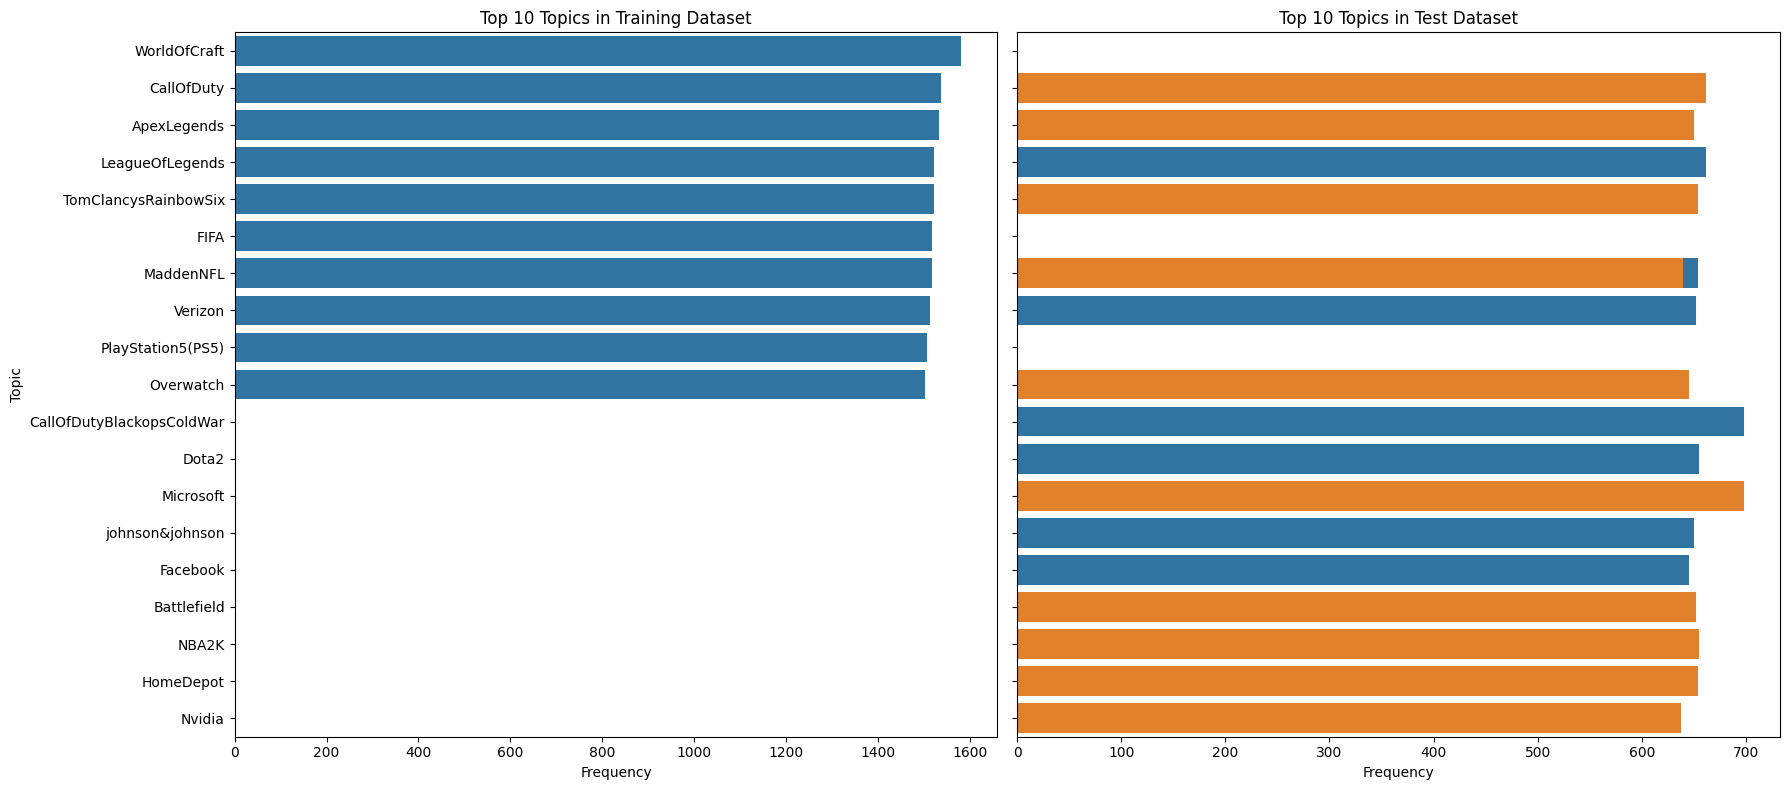

(Entity
 WorldOfCraft            1581
 CallOfDuty              1537
 ApexLegends             1534
 LeagueOfLegends         1522
 TomClancysRainbowSix    1522
 FIFA                    1517
 MaddenNFL               1517
 Verizon                 1513
 PlayStation5(PS5)       1506
 Overwatch               1503
 Name: count, dtype: int64,
 Entity
 CallOfDutyBlackopsColdWar    698
 LeagueOfLegends              662
 Dota2                        655
 Microsoft                    654
 MaddenNFL                    654
 Verizon                      652
 johnson&johnson              650
 Facebook                     645
 Battlefield                  640
 TomClancysRainbowSix         638
 Name: count, dtype: int64,
 Entity
 Microsoft               246
 CallOfDuty              243
 NBA2K                   242
 HomeDepot               240
 TomClancysRainbowSix    240
 Battlefield             235
 ApexLegends             232
 Overwatch               229
 MaddenNFL               229
 Nvidia            

In [18]:
# Calculate topic frequency for both datasets
topic_frequency_training = train_data['Entity'].value_counts().head(10)
topic_frequency_validation = validation_data['Entity'].value_counts().head(10)
topic_frequency_test = test_data['Entity'].value_counts().head(10)

# Plotting topic frequency for training and validation datasets
fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

sns.barplot(y=topic_frequency_training.index, x=topic_frequency_training.values, ax=ax[0])
ax[0].set_title('Top 10 Topics in Training Dataset')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Topic')

sns.barplot(y=topic_frequency_validation.index, x=topic_frequency_validation.values, ax=ax[1])
ax[1].set_title('Top 10 Topics in Validation Dataset')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('')

sns.barplot(y=topic_frequency_test.index, x=topic_frequency_validation.values, ax=ax[1])
ax[1].set_title('Top 10 Topics in Test Dataset')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

topic_frequency_training, topic_frequency_validation, topic_frequency_test

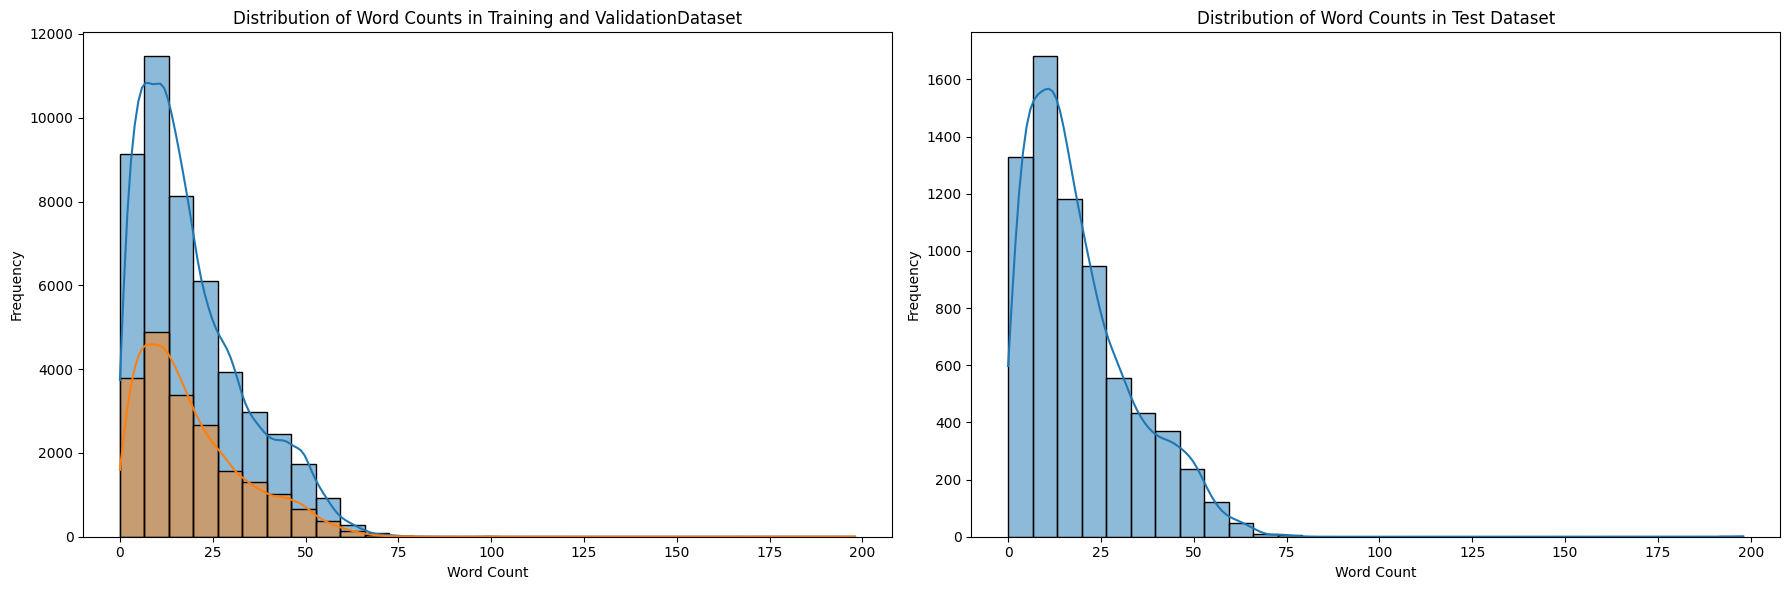

(count    47256.000000
 mean        19.253259
 std         14.439450
 min          0.000000
 25%          8.000000
 50%         16.000000
 75%         27.000000
 max        198.000000
 Name: word_count, dtype: float64,
 count    19815.000000
 mean        19.168458
 std         14.464583
 min          0.000000
 25%          8.000000
 50%         15.000000
 75%         27.000000
 max        198.000000
 Name: word_count, dtype: float64,
 count    6924.000000
 mean       19.212449
 std        14.403035
 min         0.000000
 25%         8.000000
 50%        16.000000
 75%        27.000000
 max       198.000000
 Name: word_count, dtype: float64)

In [19]:
# Calculate word counts for each tweet in both datasets
train_data['word_count'] = train_data['Tweets'].str.split().str.len()
validation_data['word_count'] = validation_data['Tweets'].str.split().str.len()
test_data['word_count'] = test_data['Tweets'].str.split().str.len()


# Plotting distribution of word counts
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(train_data['word_count'], bins=30, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Word Counts in Training and ValidationDataset')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

sns.histplot(validation_data['word_count'], bins=30, ax=ax[0], kde=True)
ax[1].set_title('Distribution of Word Counts in Validation Dataset')
ax[1].set_xlabel('Word Count')
ax[1].set_ylabel('Frequency')

sns.histplot(test_data['word_count'], bins=30, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Word Counts in Test Dataset')
ax[1].set_xlabel('Word Count')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Basic statistics of word counts in both datasets
stats_training = train_data['word_count'].describe()
stats_validation = validation_data['word_count'].describe()
stats_test = test_data['word_count'].describe()

stats_training, stats_validation, stats_test


In [20]:
# Calculate the number of missing tweet texts in the training dataset
missing_tweets_training = train_data['Tweets'].isnull().sum()

# Proportion of missing tweet texts
missing_proportion_training = missing_tweets_training / len(train_data)

missing_tweets_training, missing_proportion_training


(425, 0.008913403661835951)

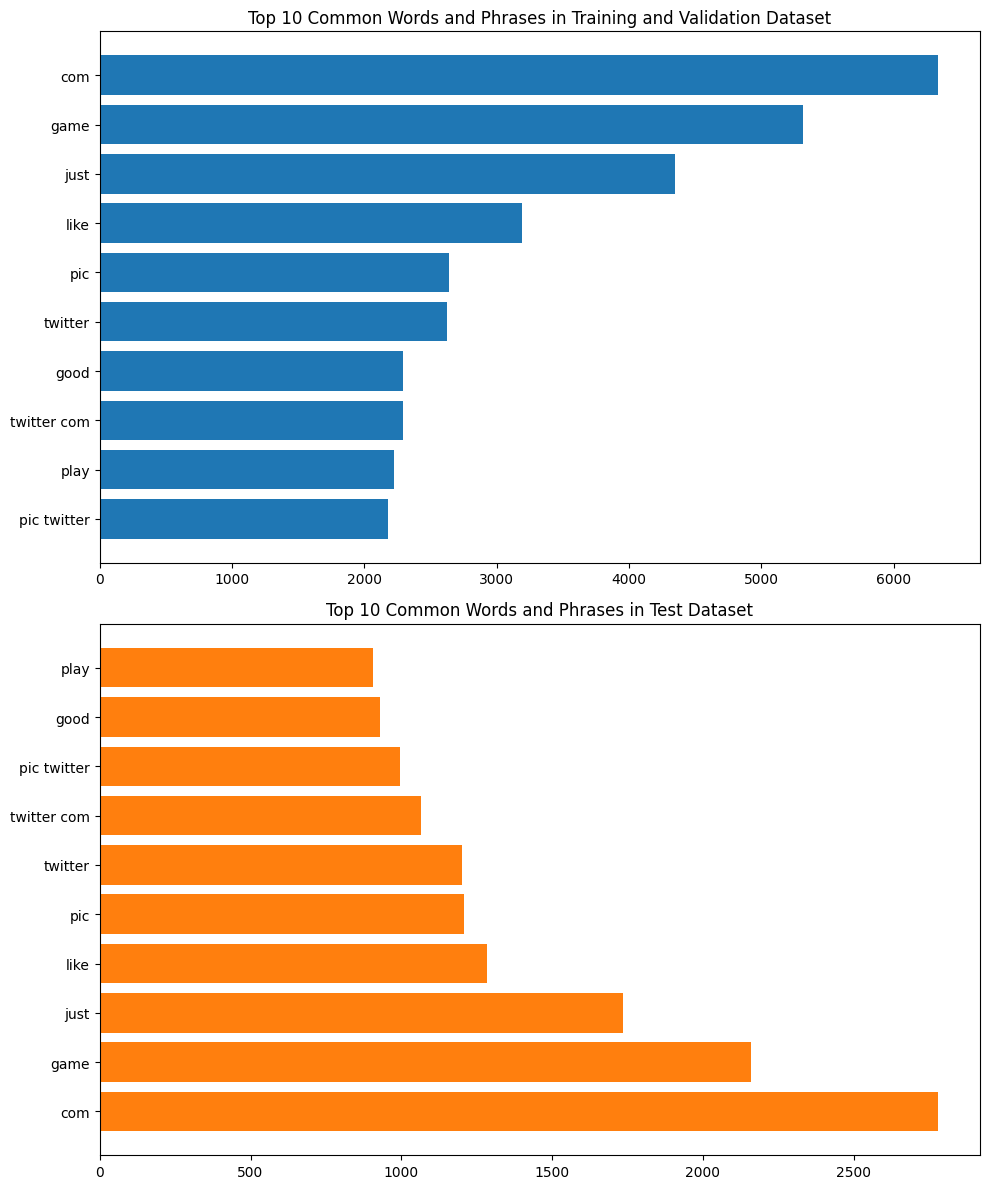

In [21]:
def get_common_words_phrases(text_series, n_features=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=n_features, ngram_range=(1, 2))
    word_matrix = vectorizer.fit_transform(text_series.dropna())
    sum_words = word_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n_features]


common_words_phrases_training = get_common_words_phrases(train_data['Tweets'], 10)
common_words_phrases_validation = get_common_words_phrases(validation_data['Tweets'], 10)
common_words_phrases_test = get_common_words_phrases(test_data['Tweets'], 10)


# Plotting the most common words and phrases for both datasets
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Training dataset
words_training, freqs_training = zip(*common_words_phrases_training)
ax[0].barh(words_training, freqs_training)
ax[0].set_title('Top 10 Common Words and Phrases in Training and Validation Dataset')
ax[0].invert_yaxis()

# Validation dataset
words_validation, freqs_validation = zip(*common_words_phrases_validation)
ax[1].barh(words_validation, freqs_validation)
ax[1].set_title('Top 10 Common Words and Phrases in Validation Dataset')
ax[1].invert_yaxis()

# Test dataset
words_test, freqs_test = zip(*common_words_phrases_validation)
ax[1].barh(words_test, freqs_test)
ax[1].set_title('Top 10 Common Words and Phrases in Test Dataset')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Data Cleaning

In [22]:
#converting columns from object to string

train_data['Entity'] = train_data['Entity'].apply(str)
train_data['Sentiment'] = train_data['Sentiment'].apply(str)
train_data['Tweets'] = train_data['Tweets'].apply(str)

validation_data['Entity'] = validation_data['Entity'].apply(str)
validation_data['Sentiment'] = validation_data['Sentiment'].apply(str)
validation_data['Tweets'] = validation_data['Tweets'].apply(str)

test_data['Entity'] = test_data['Entity'].apply(str)
test_data['Sentiment'] = test_data['Sentiment'].apply(str)
test_data['Tweets'] = test_data['Tweets'].apply(str)

In [23]:
# Check for missing values in both datasets
missing_values_training = train_data.isnull().sum()
missing_values_validation = validation_data.isnull().sum()
missing_values_validation = test_data.isnull().sum()

missing_values_training, missing_values_validation


(Twitter ID      0
 Entity          0
 Sentiment       0
 Tweets          0
 word_count    425
 dtype: int64,
 Twitter ID     0
 Entity         0
 Sentiment      0
 Tweets         0
 word_count    76
 dtype: int64)

In [24]:
#Lowercasing

train_data['Tweets'] = train_data['Tweets'].str.lower()
validation_data['Tweets'] = validation_data['Tweets'].str.lower()
test_data['Tweets'] = test_data['Tweets'].str.lower()


In [25]:
# Removing Special Characters and Numbers

train_data['Tweets'] = train_data['Tweets'].str.replace('[^a-zA-Z\s]', '', regex=True)
validation_data['Tweets'] = validation_data['Tweets'].str.replace('[^a-zA-Z\s]', '', regex=True)
test_data['Tweets'] = test_data['Tweets'].str.replace('[^a-zA-Z\s]', '', regex=True)

In [26]:
# Removing Extra Spaces

train_data['Tweets'] = train_data['Tweets'].str.replace('\s+', ' ', regex=True).str.strip()
validation_data['Tweets'] = validation_data['Tweets'].str.replace('\s+', ' ', regex=True).str.strip()
test_data['Tweets'] = test_data['Tweets'].str.replace('\s+', ' ', regex=True).str.strip()

In [27]:
train_data

,Twitter ID,Entity,Sentiment,Tweets,word_count
50474,6264,FIFA,Positive,play the rest of the season and the euros on f...,38.0
11681,8408,NBA2K,Negative,k games is never the same again,8.0
68997,3816,Cyberpunk2077,Positive,the new cyberpunk a gameplay demo is just insa...,39.0
10999,13091,Xbox(Xseries),Positive,im extremely lukewarm on outside of spiderman ...,19.0
49448,6088,FIFA,Irrelevant,on next day th april a tragedy rocked the worl...,46.0
...,...,...,...,...,...
878,2555,Borderlands,Negative,holy shit borderlands st ass,6.0
31380,7389,LeagueOfLegends,Neutral,had a thought to use kbm players to play leagu...,17.0
73445,8981,Nvidia,Positive,andrew gostine md mba tells the story of how h...,22.0
38175,5345,Hearthstone,Negative,i suck at serving hearthstone today i,8.0


In [28]:
validation_data

,Twitter ID,Entity,Sentiment,Tweets,word_count
58085,11560,TomClancysRainbowSix,Positive,shhhhh something is loading,6.0
58821,3283,Facebook,Negative,maybe i already m tired of scrolling on facebook,10.0
42258,10050,PlayerUnknownsBattlegrounds(PUBG),Positive,ive just played pub with someone with a sweet ...,16.0
18999,12455,WorldOfCraft,Neutral,check out this item please i just once got mal...,16.0
56970,11374,TomClancysRainbowSix,Positive,it was fun,3.0
...,...,...,...,...,...
50351,6244,FIFA,Irrelevant,you got this kathy make kc proud,8.0
59901,3466,Facebook,Neutral,aww i never knew twitter launches balloons acr...,50.0
9,2402,Borderlands,Positive,so i spent a few hours making something for fu...,56.0
33743,6596,Fortnite,Irrelevant,so my crush is listening to random song in our...,44.0


In [29]:
test_data

,Twitter ID,Entity,Sentiment,Tweets,word_count
34877,6792,Fortnite,Irrelevant,went to go in georges room to find his door wa...,34.0
21704,4115,CS-GO,Positive,yo this looks lit teamgooverwatch combo,6.0
47008,5665,HomeDepot,Negative,pay attention executive administrators while y...,29.0
7969,9369,Overwatch,Irrelevant,guy looked at me and says my name was put on t...,24.0
454,2476,Borderlands,Positive,one,1.0
...,...,...,...,...,...
14946,2960,Dota2,Negative,dota do you care about the player base at all ...,30.0
49453,6089,FIFA,Negative,eahelp i bought fifa per unit i play with xbox...,49.0
6698,353,Amazon,Neutral,nan,NaN
34768,6771,Fortnite,Positive,appstore plz unban fortnite i mean people prod...,59.0


In [30]:
print(train_data.columns)
print(validation_data.columns)
print(test_data.columns)

Index(['Twitter ID', 'Entity', 'Sentiment', 'Tweets', 'word_count'], dtype='object')
Index(['Twitter ID', 'Entity', 'Sentiment', 'Tweets', 'word_count'], dtype='object')
Index(['Twitter ID', 'Entity', 'Sentiment', 'Tweets', 'word_count'], dtype='object')


In [31]:
cols = ['Twitter ID', 'Entity', 'word_count']
x = train_data.drop(cols, axis=1, inplace=True)

In [32]:
cols = ['Twitter ID', 'Entity', 'word_count']
x = validation_data.drop(cols, axis=1, inplace=True)

In [33]:
cols = ['Twitter ID', 'Entity', 'word_count']
x = test_data.drop(cols, axis=1, inplace=True)

In [34]:
print(train_data.columns)
print(validation_data.columns)
print(test_data.columns)

Index(['Sentiment', 'Tweets'], dtype='object')
Index(['Sentiment', 'Tweets'], dtype='object')
Index(['Sentiment', 'Tweets'], dtype='object')


## Encode Categorical Column (Sentiment)

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data["Sentiment"])

train_data["Sentiment"] = encoder.transform(train_data["Sentiment"])
validation_data["Sentiment"] = encoder.transform(validation_data["Sentiment"])
test_data["Sentiment"] = encoder.transform(test_data["Sentiment"])

In [36]:
validation_data

,Sentiment,Tweets
58085,3,shhhhh something is loading
58821,1,maybe i already m tired of scrolling on facebook
42258,3,ive just played pub with someone with a sweet ...
18999,2,check out this item please i just once got mal...
56970,3,it was fun
...,...,...
50351,0,you got this kathy make kc proud
59901,2,aww i never knew twitter launches balloons acr...
9,3,so i spent a few hours making something for fu...
33743,0,so my crush is listening to random song in our...


In [37]:
train_data

,Sentiment,Tweets
50474,3,play the rest of the season and the euros on f...
11681,1,k games is never the same again
68997,3,the new cyberpunk a gameplay demo is just insa...
10999,3,im extremely lukewarm on outside of spiderman ...
49448,0,on next day th april a tragedy rocked the worl...
...,...,...
878,1,holy shit borderlands st ass
31380,2,had a thought to use kbm players to play leagu...
73445,3,andrew gostine md mba tells the story of how h...
38175,1,i suck at serving hearthstone today i


In [38]:
test_data

,Sentiment,Tweets
34877,0,went to go in georges room to find his door wa...
21704,3,yo this looks lit teamgooverwatch combo
47008,1,pay attention executive administrators while y...
7969,0,guy looked at me and says my name was put on t...
454,3,one
...,...,...
14946,1,dota do you care about the player base at all ...
49453,1,eahelp i bought fifa per unit i play with xbox...
6698,2,nan
34768,3,appstore plz unban fortnite i mean people prod...


## Tokenization

In [39]:
import nltk
nltk.download('punkt')

# Tokenization
train_data['Tweets'] = train_data['Tweets'].apply(lambda x: word_tokenize(x))
validation_data['Tweets'] = validation_data['Tweets'].apply(lambda x: word_tokenize(x))
test_data['Tweets'] = test_data['Tweets'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Loricson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    if isinstance(text, list):
        return [word for word in text if word not in stop_words]
    else:
        return ' '.join([word for word in text.split() if word not in stop_words])

train_data['Tweets'] = train_data['Tweets'].apply(remove_stopwords)
validation_data['Tweets'] = validation_data['Tweets'].apply(remove_stopwords)
test_data['Tweets'] = test_data['Tweets'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Loricson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Lemmatization
import spacy

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # Load English model

# Function to apply lemmatization
def lemmatize_text(text):
    if isinstance(text, list):
        text = ' '.join(text)
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply lemmatization to the Tweets
train_data['Tweets'] = train_data['Tweets'].apply(lemmatize_text)
validation_data['Tweets'] = validation_data['Tweets'].apply(lemmatize_text)
test_data['Tweets'] = test_data['Tweets'].apply(lemmatize_text)

In [42]:
# Initialize the TfidfVectorizer
#tfidf_vect = TfidfVectorizer()
tfidf_vect = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2), min_df=3, max_df=0.9)

# Fit and transform the training data
X_train_tfidf = tfidf_vect.fit_transform(train_data['Tweets'])

# Transform the validation dataset
X_validation_tfidf = tfidf_vect.transform(validation_data['Tweets'])

# Transform the test dataset
X_test_tfidf = tfidf_vect.transform(test_data['Tweets'])

In [43]:
X_train_tfidf

<47681x59145 sparse matrix of type '<class 'numpy.float64'>'
	with 612806 stored elements in Compressed Sparse Row format>

In [44]:
X_validation_tfidf

<20000x59145 sparse matrix of type '<class 'numpy.float64'>'
	with 223312 stored elements in Compressed Sparse Row format>

In [45]:
X_test_tfidf

<7000x59145 sparse matrix of type '<class 'numpy.float64'>'
	with 78811 stored elements in Compressed Sparse Row format>

In [46]:
X_train_tfidf.shape

(47681, 59145)

In [47]:
X_validation_tfidf.shape

(20000, 59145)

In [48]:
X_test_tfidf.shape

(7000, 59145)

In [49]:
# Encode categorical target variable into numerical labels if needed
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit_transform(train_data['Sentiment'])

# Encode categorical target variable into numerical labels for validation set
label_encoder.transform(validation_data['Sentiment'])

label_encoder.transform(test_data['Sentiment'])

array([0, 3, 1, ..., 2, 3, 1], dtype=int64)

In [50]:
train_data

,Sentiment,Tweets
50474,3,play rest season euro fifa good fifa squad tea...
11681,1,k games never
68997,3,new cyberpunk gameplay demo insane every singl...
10999,3,I m extremely lukewarm outside spiderman gran ...
49448,0,next day th april tragedy rock world zambia wa...
...,...,...
878,1,holy shit borderland st ass
31380,2,think use kbm player play league legend fortni...
73445,3,andrew gostine md mba tell story startup white...
38175,1,suck serve hearthstone today


In [51]:
validation_data

,Sentiment,Tweets
58085,3,shhhhh something load
58821,1,maybe already tired scroll facebook
42258,3,I ve play pub someone sweet sabahan accent I m...
18999,2,check item please get malignant leviathan hauberk
56970,3,fun
...,...,...
50351,0,get kathy make kc proud
59901,2,aww never know twitter launch balloon across s...
9,3,spend hour make something fun do not know huge...
33743,0,crush listen random song class discord server ...


In [52]:
test_data

,Sentiment,Tweets
34877,0,go go george room find door lock climbed side ...
21704,3,yo look lit teamgooverwatch combo
47008,1,pay attention executive administrator store ta...
7969,0,guy look say name put throw list lmaoooo get f...
454,3,one
...,...,...
14946,1,dota care player base what s use k half game c...
49453,1,eahelp buy fifa per unit play xbox one control...
6698,2,nan
34768,3,appstore plz unban fortnite mean people produc...


## Building Linear Regression Model

In [53]:
# Split the data into features (X) and target variable (y)
X_train = X_train_tfidf
y_train = train_data['Sentiment']

# Split the data into features (X) and target variable (y) for validation set
X_validation = X_validation_tfidf
y_validation = validation_data['Sentiment']

In [54]:
#Create and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Hyperparameter: Regularization strength (C), Regularization penalty, max_iter
C = 1.0  
logistic_reg = LogisticRegression(C=C, max_iter=1000)
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
# Make predictions on the validation set
y_pred = logistic_reg.predict(X_validation)

In [56]:
y_pred

array([3, 2, 3, ..., 3, 0, 2])

In [57]:
# Evaluate the model (using metrics suitable for classification)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [58]:
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average='weighted')
recall = recall_score(y_validation, y_pred, average='weighted')
f1 = f1_score(y_validation, y_pred, average='weighted')
report = classification_report(y_validation, y_pred)

In [59]:
print("Accuracy: {0:0.4f}".format(accuracy*100, '%'),"%")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("Classification Report: ", report)

Accuracy: 79.1950 %
Precision:  0.7956143442318704
Recall:  0.79195
F1-Score:  0.790994972264591
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.66      0.75      3466
           1       0.81      0.86      0.83      6053
           2       0.73      0.79      0.76      4922
           3       0.79      0.81      0.80      5559

    accuracy                           0.79     20000
   macro avg       0.80      0.78      0.79     20000
weighted avg       0.80      0.79      0.79     20000



## Learning Curve

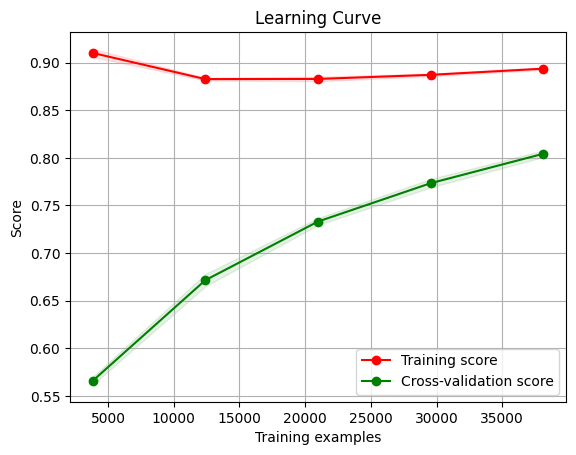

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(logistic_reg, "Learning Curve", X_train, y_train, cv=5)
plt.show()


## Hyperparameter Tuning (Grid Search)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2'],  # regularization penalty (L1 or L2)
    'C': [0.01, 0.1, 1, 10],  # regularization strength
}

# Initialize grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

C:\Users\Loricson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Loricson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Loricson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Loricson\AppData\Local\Programs\Python\Python310\lib\

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [62]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [63]:
print(best_params)
print(best_model)

{'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10, max_iter=1000)


In [64]:
#logistic_reg = LogisticRegression(C=C)
C = 10
logistic_reg = LogisticRegression(C=C, max_iter=1000, penalty='l2')
#logistic_reg = LogisticRegression(C=10, max_iter=1000, solver='saga', class_weight='balanced') 86.25-val 85.71-test
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [65]:
# Make predictions on the validation set
y_pred = logistic_reg.predict(X_validation)

In [66]:
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average='weighted')
recall = recall_score(y_validation, y_pred, average='weighted')
f1 = f1_score(y_validation, y_pred, average='weighted')
report = classification_report(y_validation, y_pred)

In [67]:
print("Accuracy: {0:0.2f}".format(accuracy*100, '%'),"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(report)

Accuracy: 86.36 %
Precision: 0.8654160042696601
Recall: 0.8636
F1-Score: 0.8635171697518145
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      3466
           1       0.90      0.89      0.89      6053
           2       0.85      0.85      0.85      4922
           3       0.82      0.89      0.85      5559

    accuracy                           0.86     20000
   macro avg       0.87      0.86      0.86     20000
weighted avg       0.87      0.86      0.86     20000



In [68]:
# Split the data into features (X) and target variable (y) for test set
X_test = X_test_tfidf
y_test = test_data['Sentiment']

# Load the trained model
loaded_model = logistic_reg  # Assuming logistic_reg is the trained model

# Transform the test dataset
X_test_tfidf = tfidf_vect.transform(test_data['Tweets'])

# Make predictions on the test set
y_pred_test = loaded_model.predict(X_test_tfidf)

In [69]:
# Evaluate model performance on the test set
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
report = classification_report(y_test, y_pred_test)

print("Test Set Accuracy: {0:0.2f}".format(accuracy*100, '%'),"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Classification Report:\n", report)

Test Set Accuracy: 85.76 %
Precision: 0.8591426831574419
Recall: 0.8575714285714285
F1-Score: 0.8574119969790565
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1251
           1       0.89      0.88      0.89      2103
           2       0.84      0.85      0.84      1656
           3       0.82      0.89      0.85      1990

    accuracy                           0.86      7000
   macro avg       0.86      0.85      0.85      7000
weighted avg       0.86      0.86      0.86      7000

